#**Credit Card Fraud Detection**

It is important that credit card companies are able to recognize fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd

**ID** - Client Number <br>
**GENDER** - M : Male , F : Female<br>
**CAR** - Owns car or NO<br>
**REALITY** - Is there a property<br>
**NO_OF_CHILD** - Number Of Children<br>
**INCOME** - Anually Income<br>
**EDUCATION_TYPE** - Educaiton Level<br>
**FAMILY_TYP**E - Marital Status<br>
**HOUSE_TYPE** - Way of Living<br>
**FLAG_MOBILE** - Is there a mobile phone<br>
**WORK_PHONE** - Is there a work phone<br>
**PHONE** - Is there a phone<br>
**OCCUPATION_TYPE** - Occupation<br>
**FAMILY_SIZE** - No. Of family members<br>
**BEGIN_MONTH** - The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on<br>
**AGE** - Age of the <br>
**YEARS_EMPLOYED** - Years of working<br>
**Target** - *Yes* : **1**, *No* : **0** // *Yes* - **Fraud**, No - **Not_fraud**

In [2]:
# read data
df=pd.read_csv("/content/drive/MyDrive/luminar data/credit_dataset.csv")
df

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


#**Data Preprocessing**

In [3]:
# To Find data is imbalanced or not

df["TARGET"].value_counts()

0    24712
1      422
Name: TARGET, dtype: int64

In [4]:
# To find missing value
df.isna().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [5]:
# Find the Data types
df.dtypes

Unnamed: 0          int64
ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,12566.500000,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,25133.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [7]:
# droping the unwanted features
df.drop(["Unnamed: 0","ID","FLAG_MOBIL"],axis=1,inplace=True)
df

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,11,48,7,1
25130,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,0,1,1,2.0,23,34,4,1
25131,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,2.0,32,34,4,1
25132,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,9,49,2,1


0    24712
1      422
Name: TARGET, dtype: int64


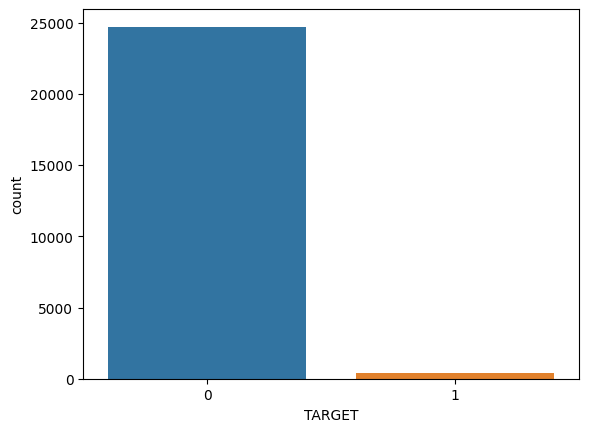

In [8]:
# visualization of target variable

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="TARGET",data=df)
print(df["TARGET"].value_counts())

0    24712
1      422
Name: TARGET, dtype: int64


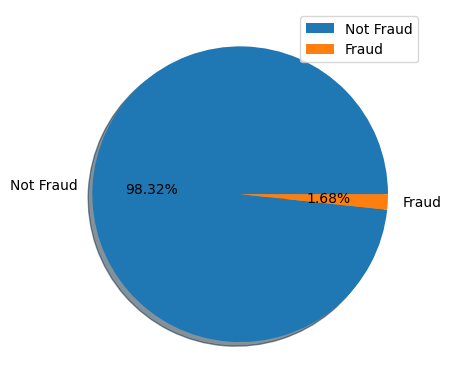

In [9]:
# pie chart
import matplotlib.pyplot as plt

z= df["TARGET"].value_counts()
print(z)
fraud = ["Not Fraud", "Fraud"]

plt.pie(z, labels=fraud,autopct='%1.2f%%',shadow=True)
plt.legend()
plt.show()


In [10]:
# labels = ["Not Fraud", "Fraud"]
# sizes = df["TARGET"].value_counts()

# # Create the pie chart
# fig, ax = plt.subplots()
# ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.title('Pie Chart Example')

# # Display the chart in Streamlit app
# st.pyplot(fig)

In [11]:
# sns.pairplot(df)

<Axes: xlabel='TARGET', ylabel='count'>

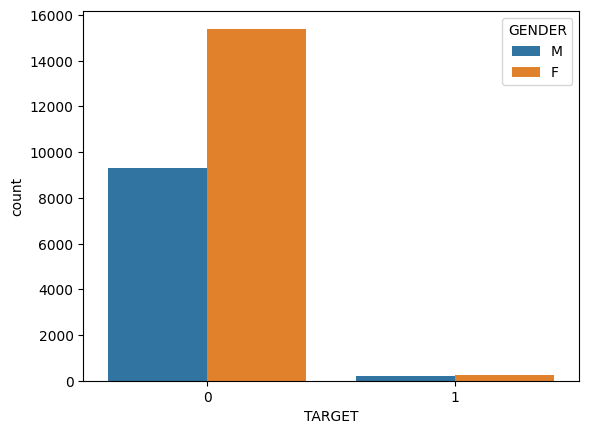

In [12]:
sns.countplot(x="TARGET",data=df,hue="GENDER")

In [13]:
# sns.boxplot(x="TARGET",y="INCOME",data=df)

In [14]:
df.dtypes

GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [15]:
# changing the data types into integer using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","FAMILY_TYPE","HOUSE_TYPE"]
for i in lst:
  df[i]=le.fit_transform(df[i])


In [16]:
# df.isna().sum()

In [17]:
X=df.iloc[:,:-1]

y=df.iloc[:,-1]


**Scaling**

In [18]:
#Scaling used by minmaxscaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X=mms.fit_transform(X)

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


#**Model Building**


In [20]:
# Model Building
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
de = DecisionTreeClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xb = XGBRFClassifier()
rf = RandomForestClassifier()

lst1 = [knn, svc, nb, de, ad, gb, xb, rf]
accuracy_without_sampling=[]

for i in lst1:
    print("_" * 100)
    print("*" * 20,i.__class__.__name__, "*" * 20)
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    # print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    accuracy=accuracy_score(y_test,y_pred)
    # accuracy_without_sampling.append(f"{i.__class__.__name__}: {accuracy}")
    accuracy_without_sampling.append(accuracy)




____________________________________________________________________________________________________
******************** KNeighborsClassifier ********************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7427
           1       0.29      0.04      0.06       114

    accuracy                           0.98      7541
   macro avg       0.64      0.52      0.53      7541
weighted avg       0.97      0.98      0.98      7541

____________________________________________________________________________________________________
******************** SVC ********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7427
           1       0.00      0.00      0.00       114

    accuracy                           0.98      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.97      0.98      0.98      7541

___________________________________

Accuracy is high but Precision and Recall is very less.therefore the data is imbalanced

In [21]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [i for i in range(10,21)],
#     'max_features': ['sqrt', 'log2'],
#     'criterion': ['gini', 'entropy']
# }

# clf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
# clf.fit(X_train, y_train)

# print(clf.best_params_)

In [22]:
# pd.DataFrame(accuracy_without_sampling)

In [23]:
# highlight the highest accuracy
accuracy_Without_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier","AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier"],
    "Accuracy_Without_Sampling": accuracy_without_sampling})
accuracy_Without_sample
accuracy_Without_sample.style.highlight_max(subset=["Accuracy_Without_Sampling"], color='lightgreen', axis=0)

,Algorithm,Accuracy_Without_Sampling
0,KNeighborsClassifier,0.984087
1,SVC,0.984883
2,GaussianNB,0.984617
3,DecisionTreeClassifier,0.967909
4,AdaBoostClassifier,0.984883
5,GradientBoostingClassifier,0.985015
6,XGBRFClassifier,0.984883
7,RandomForestClassifier,0.983822




#**LazyClassifier**

LazyClassifier is a Python library that simplifies training and evaluating multiple machine learning models, providing an easy way to compare their performance on a dataset in just one line of code.



In [24]:
# pip install lazypredict

In [25]:
# from lazypredict.Supervised import LazyClassifier

In [26]:
# clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
# models,predictions=clf.fit(X_train,X_test,y_train,y_test)
# models

#**Feature Selection**
Feature selection is the process of selecting a subset of relevant features from a larger set of available features in a dataset.<br>Removing irrelevant or redundant features, and focusing on the most informative ones.

<Axes: >

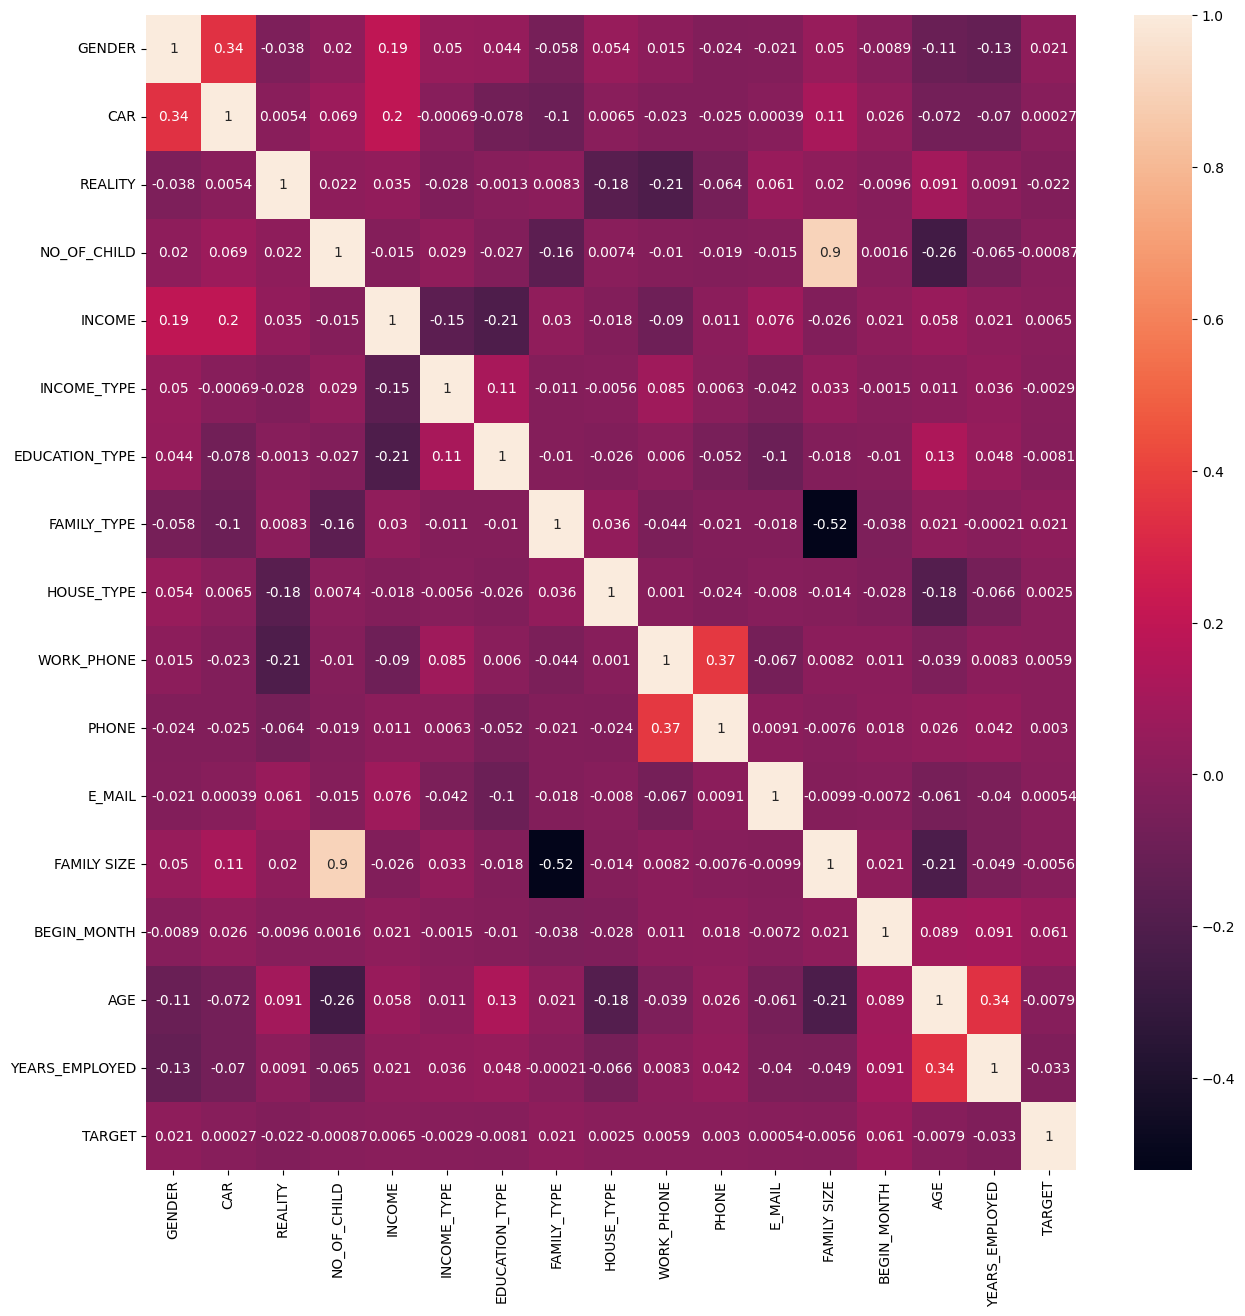

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.drop(["NO_OF_CHILD"],axis=1,inplace=True)

In [29]:
df.to_csv('edited_credict.csv', index=False)

The data is imbalanced  the we use the Resampling Techniques


1.   Over Sampling
2.   Under Sampling
3.   SMOTEENN












#**Over Sampling**
Oversampling is a technique used to address class imbalance in a dataset by increasing the number of samples in the minority class

In [30]:
X=df.iloc[:,:-1]

y=df.iloc[:,-1]

In [31]:
# Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)


0    24712
1    24712
Name: TARGET, dtype: int64


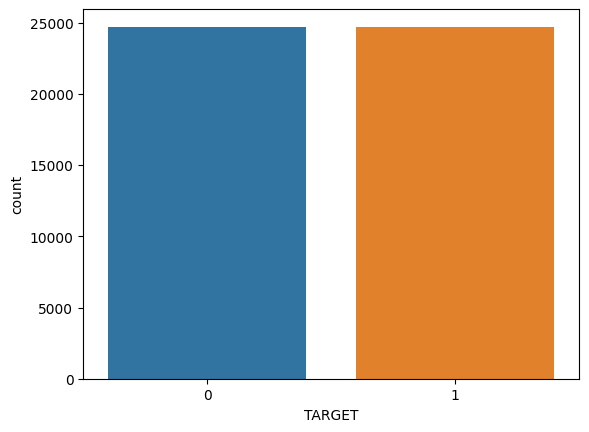

In [32]:
# countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_os,data=df)
print(y_os.value_counts())

0    24712
1    24712
Name: TARGET, dtype: int64


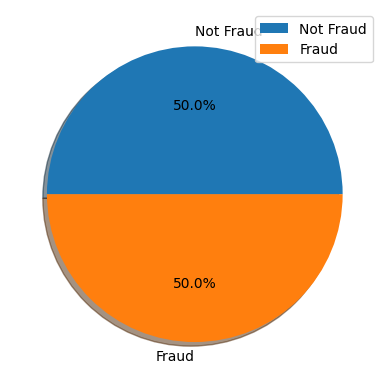

In [33]:
# pie chart
import matplotlib.pyplot as plt

z = y_os.value_counts()
print(z)
fraud = ["Not Fraud", "Fraud"]

plt.pie(z, labels=fraud,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

In [34]:
y_os.value_counts()

0    24712
1    24712
Name: TARGET, dtype: int64

In [35]:
# scaling
X_os=mms.fit_transform(X_os)


In [36]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [37]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
de = DecisionTreeClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xb = XGBRFClassifier()
rf = RandomForestClassifier()

lst1 = [knn, svc, nb, de, ad, gb, xb, rf]
accuracy_over_sampling=[]

for i in lst1:
    print("_" * 100)
    print("*" * 20,i.__class__.__name__, "*" * 20)
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    # print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    accuracy=accuracy_score(y_test,y_pred)
    # accuracy_over_sampling.append(f"{i.__class__.__name__}: {accuracy}")
    accuracy_over_sampling.append(accuracy)



____________________________________________________________________________________________________
******************** KNeighborsClassifier ********************
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7521
           1       0.91      0.98      0.94      7307

    accuracy                           0.94     14828
   macro avg       0.94      0.94      0.94     14828
weighted avg       0.95      0.94      0.94     14828

____________________________________________________________________________________________________
******************** SVC ********************
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7521
           1       0.82      0.89      0.86      7307

    accuracy                           0.85     14828
   macro avg       0.85      0.85      0.85     14828
weighted avg       0.85      0.85      0.85     14828

___________________________________

In [38]:
# highlight the highest accuracy

accuracy_os_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier"],
    "Accuracy_Over_Sampling": accuracy_over_sampling})
accuracy_os_sample
accuracy_os_sample.style.highlight_max(subset=["Accuracy_Over_Sampling"], color='lightgreen', axis=0)

,Algorithm,Accuracy_Over_Sampling
0,KNeighborsClassifier,0.941934
1,SVC,0.851902
2,GaussianNB,0.701915
3,DecisionTreeClassifier,0.974710
4,AdaBoostClassifier,0.839223
5,GradientBoostingClassifier,0.895131
6,XGBRFClassifier,0.831400
7,RandomForestClassifier,0.989817


#**Over Sampling-Feature Extraction**

In [39]:
# Principal Component Analysis PCA-use dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA()
X_os=pca.fit_transform(X_os)

In [40]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)


In [41]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
de = DecisionTreeClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xb = XGBRFClassifier()
rf = RandomForestClassifier()

lst1 = [knn, svc, nb, de, ad, gb, xb, rf]
accuracy_over_sampling_pca=[]

for i in lst1:
    print("_" * 100)
    print("*" * 20,i.__class__.__name__, "*" * 20)
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    # print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    accuracy=accuracy_score(y_test,y_pred)
    # accuracy_over_sampling_pca.append(f"{i.__class__.__name__}: {accuracy}")
    accuracy_over_sampling_pca.append(accuracy)

____________________________________________________________________________________________________
******************** KNeighborsClassifier ********************
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7521
           1       0.91      0.98      0.94      7307

    accuracy                           0.94     14828
   macro avg       0.94      0.94      0.94     14828
weighted avg       0.95      0.94      0.94     14828

____________________________________________________________________________________________________
******************** SVC ********************
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      7521
           1       0.83      0.90      0.86      7307

    accuracy                           0.86     14828
   macro avg       0.86      0.86      0.86     14828
weighted avg       0.86      0.86      0.86     14828

___________________________________

In [42]:
# highlight the highest accuracy
accuracy_over_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier"],
    "Accuracy_Over_Sampling": accuracy_over_sampling,
    "Accuracy_Over_Sampling_PCA": accuracy_over_sampling_pca})
accuracy_over_sample
accuracy_over_sample.style.highlight_max(subset=["Accuracy_Over_Sampling", "Accuracy_Over_Sampling_PCA"], color='lightgreen', axis=0)

,Algorithm,Accuracy_Over_Sampling,Accuracy_Over_Sampling_PCA
0,KNeighborsClassifier,0.941934,0.941934
1,SVC,0.851902,0.859995
2,GaussianNB,0.701915,0.720596
3,DecisionTreeClassifier,0.974710,0.956906
4,AdaBoostClassifier,0.839223,0.798827
5,GradientBoostingClassifier,0.895131,0.846641
6,XGBRFClassifier,0.831400,0.807998
7,RandomForestClassifier,0.989817,0.978554


#**under sampling**

Undersampling is a technique used to address class imbalance in a dataset by reducing the number of samples in the majority class.

In [43]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [44]:
# RandomUnderSampler -It randomly selects a subset of samples from the majority class
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)


0    422
1    422
Name: TARGET, dtype: int64


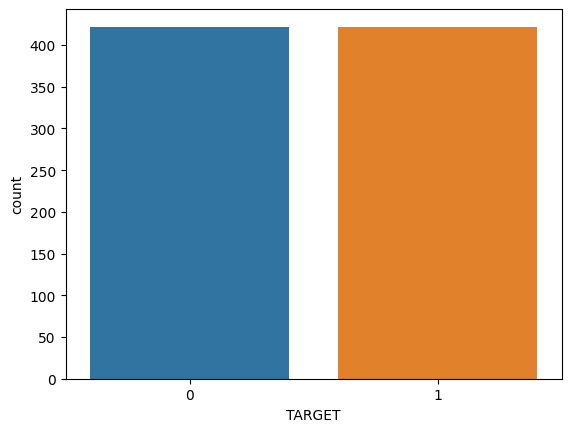

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_us,data=df)
print(y_us.value_counts())

0    422
1    422
Name: TARGET, dtype: int64


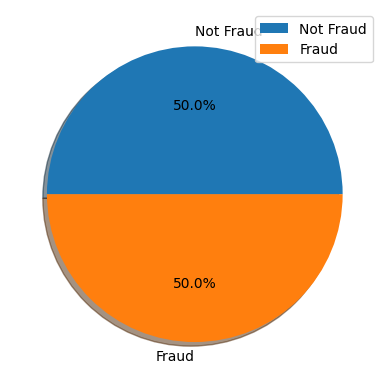

In [46]:
import matplotlib.pyplot as plt

z = y_us.value_counts()
print(z)
fraud = ["Not Fraud", "Fraud"]

plt.pie(z, labels=fraud,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

In [47]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [48]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
de = DecisionTreeClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xb = XGBRFClassifier()
rf = RandomForestClassifier()

lst1 = [knn, svc, nb, de, ad, gb, xb, rf]
accuracy_under_sampling=[]

for i in lst1:
    print("_" * 100)
    print("*" * 20,i.__class__.__name__, "*" * 20)
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    # print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    accuracy=accuracy_score(y_test,y_pred)
    # accuracy_under_sampling.append(f"{i.__class__.__name__}: {accuracy}")
    accuracy_under_sampling.append(accuracy)



____________________________________________________________________________________________________
******************** KNeighborsClassifier ********************
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       123
           1       0.60      0.66      0.63       131

    accuracy                           0.60       254
   macro avg       0.60      0.60      0.60       254
weighted avg       0.60      0.60      0.60       254

____________________________________________________________________________________________________
******************** SVC ********************
              precision    recall  f1-score   support

           0       0.48      0.72      0.57       123
           1       0.49      0.26      0.34       131

    accuracy                           0.48       254
   macro avg       0.48      0.49      0.46       254
weighted avg       0.48      0.48      0.45       254

___________________________________

In [49]:
# highlight the highest accuracy
accuracy_us_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier"],

    "Accuracy_Under_Sampling_PCA": accuracy_under_sampling})
accuracy_us_sample
accuracy_us_sample.style.highlight_max(subset=["Accuracy_Under_Sampling_PCA"], color='lightgreen', axis=0)

,Algorithm,Accuracy_Under_Sampling_PCA
0,KNeighborsClassifier,0.602362
1,SVC,0.480315
2,GaussianNB,0.574803
3,DecisionTreeClassifier,0.598425
4,AdaBoostClassifier,0.562992
5,GradientBoostingClassifier,0.606299
6,XGBRFClassifier,0.574803
7,RandomForestClassifier,0.661417


#***SMOTEENN***
**SMOTEENN** is a combination of two techniques: **SMOTE** (Synthetic Minority Over-sampling Technique) and **Edited Nearest Neighbors** (ENN).<br> It is used to address class imbalance in a dataset by oversampling the minority class and simultaneously cleaning the data by **removing noisy samples**.

**Edited Nearest Neighbors** (ENN) is a data cleaning technique used to remove noisy samples from a dataset

In [50]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [51]:
# SMOTEENN
from imblearn.combine import SMOTEENN
sc=SMOTEENN()
X_sc,y_sc=sc.fit_resample(X,y)


In [52]:
X_sc=mms.fit_transform(X_sc)

1    23880
0    21436
Name: TARGET, dtype: int64


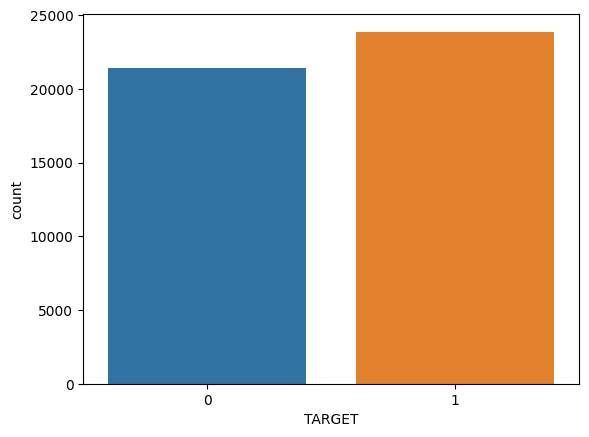

In [53]:
# countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_sc,data=df)
print(y_sc.value_counts())


1    23880
0    21436
Name: TARGET, dtype: int64


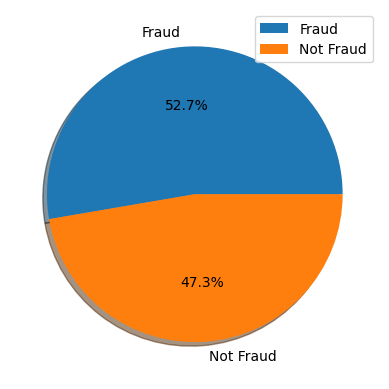

In [54]:
# pie chart
import matplotlib.pyplot as plt

z = y_sc.value_counts()
print(z)
fraud = ["Fraud", "Not Fraud"]

plt.pie(z, labels=fraud,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

In [55]:
# train test   split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y_sc,test_size=0.3,random_state=1)

In [56]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
de = DecisionTreeClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xb = XGBRFClassifier()
rf = RandomForestClassifier()

lst1 = [knn, svc, nb, de, ad, gb, xb, rf]
accuracy_smoteenn=[]

for i in lst1:
    print("_" * 100)
    print("*" * 20,i.__class__.__name__, "*" * 20)
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    # print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    accuracy=accuracy_score(y_test,y_pred)
    # accuracy_smoteenn.append(f"{i.__class__.__name__}: {accuracy}")
    accuracy_smoteenn.append(accuracy)

____________________________________________________________________________________________________
******************** KNeighborsClassifier ********************
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6477
           1       0.92      0.98      0.95      7118

    accuracy                           0.94     13595
   macro avg       0.95      0.94      0.94     13595
weighted avg       0.95      0.94      0.94     13595

____________________________________________________________________________________________________
******************** SVC ********************
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      6477
           1       0.85      0.90      0.88      7118

    accuracy                           0.87     13595
   macro avg       0.87      0.86      0.86     13595
weighted avg       0.87      0.87      0.86     13595

___________________________________

In [57]:
# highlight the highest accuracy of all
accuracy= pd.DataFrame({"Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier"],
                        'Accuracy_Without_Sampling': accuracy_without_sampling,
                        'Accuracy_Over_Sampling': accuracy_over_sampling,
                        'Accuracy_Under_Sampling':accuracy_under_sampling,
                        'Accuracy_Smoteenn':accuracy_smoteenn})

accuracy
accuracy.style.highlight_max(subset=["Accuracy_Without_Sampling", "Accuracy_Over_Sampling","Accuracy_Under_Sampling","Accuracy_Smoteenn"], color='lightgreen', axis=0)

,Algorithm,Accuracy_Without_Sampling,Accuracy_Over_Sampling,Accuracy_Under_Sampling,Accuracy_Smoteenn
0,KNeighborsClassifier,0.984087,0.941934,0.602362,0.944465
1,SVC,0.984883,0.851902,0.480315,0.865024
2,GaussianNB,0.984617,0.701915,0.574803,0.703126
3,DecisionTreeClassifier,0.967909,0.974710,0.598425,0.980066
4,AdaBoostClassifier,0.984883,0.839223,0.562992,0.841927
5,GradientBoostingClassifier,0.985015,0.895131,0.606299,0.897609
6,XGBRFClassifier,0.984883,0.831400,0.574803,0.825524
7,RandomForestClassifier,0.983822,0.989817,0.661417,0.992277


#**SMOTEENN-Feature Extraction**

In [58]:
# scaling
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_sc=mms.fit_transform(X_sc)

In [59]:
# PCA
from sklearn.decomposition import PCA
pca=PCA()
X_sc_pca=pca.fit_transform(X_sc)

In [60]:
# train test split
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_sc_pca,y_sc,test_size=0.3,random_state=1)

In [61]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
de = DecisionTreeClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xb = XGBRFClassifier()
rf = RandomForestClassifier()

lst1 = [knn, svc, nb, de, ad, gb, xb, rf]
accuracy_smoteenn_pca=[]

for i in lst1:
    print("_" * 100)
    print("*" * 20,i.__class__.__name__, "*" * 20)
    i.fit(X_train_pca,y_train_pca)
    y_pred_pca = i.predict(X_test_pca)
    # print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print(classification_report(y_test_pca,y_pred_pca))
    accuracy=accuracy_score(y_test_pca,y_pred_pca)
    # accuracy_smoteenn_pca.append(f"{i.__class__.__name__}: {accuracy}")
    accuracy_smoteenn_pca.append(accuracy)

____________________________________________________________________________________________________
******************** KNeighborsClassifier ********************
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6477
           1       0.92      0.98      0.95      7118

    accuracy                           0.94     13595
   macro avg       0.95      0.94      0.94     13595
weighted avg       0.95      0.94      0.94     13595

____________________________________________________________________________________________________
******************** SVC ********************
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      6477
           1       0.85      0.91      0.88      7118

    accuracy                           0.87     13595
   macro avg       0.88      0.87      0.87     13595
weighted avg       0.88      0.87      0.87     13595

___________________________________

In [62]:
# accuracy_using_pca = pd.DataFrame({
#     "Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier"],
#     "Accuracy_Over_Sampling_PCA": accuracy_over_sampling_pca,
#     "Accuracy_SMOTEENN_PCA": accuracy_smoteenn_pca
# })

# accuracy_using_pca.style.highlight_max(color = 'lightgreen', axis = 0)


In [63]:
 # highlight the highest accuracy using pca

accuracy_using_pca = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "SVC", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier"],
    "Accuracy_Over_Sampling_PCA": accuracy_over_sampling_pca,
    "Accuracy_SMOTEENN_PCA": accuracy_smoteenn_pca})

accuracy_using_pca.style.highlight_max(subset=["Accuracy_Over_Sampling_PCA", "Accuracy_SMOTEENN_PCA"], color='lightgreen', axis=0)

,Algorithm,Accuracy_Over_Sampling_PCA,Accuracy_SMOTEENN_PCA
0,KNeighborsClassifier,0.941934,0.944465
1,SVC,0.859995,0.873630
2,GaussianNB,0.720596,0.722177
3,DecisionTreeClassifier,0.956906,0.954174
4,AdaBoostClassifier,0.798827,0.805223
5,GradientBoostingClassifier,0.846641,0.854873
6,XGBRFClassifier,0.807998,0.826848
7,RandomForestClassifier,0.978554,0.981758


We can observe that SMOTEENN with RandomForestClassifier model produces the best accuracy in the all-machine learning model.

#**Model Prediction**

In [64]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [65]:
# SMOTEENN
from imblearn.combine import SMOTEENN
sc=SMOTEENN()
X_sc,y_sc=sc.fit_resample(X,y)

X_sc

,GENDER,CAR,REALITY,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,1,1,1,112500.0,4,4,1,1,0,0,0,2.000000,29,59,3
1,0,0,1,270000.0,0,4,3,1,0,1,1,1.000000,38,52,8
2,1,1,1,270000.0,4,1,1,1,1,1,1,2.000000,5,46,2
3,1,1,1,135000.0,0,4,1,1,0,0,0,2.000000,17,49,3
4,1,1,1,135000.0,0,4,1,1,0,0,0,2.000000,16,49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45342,0,0,0,157500.0,3,1,1,1,0,0,0,2.174604,57,37,7
45343,0,0,1,292500.0,0,4,2,4,0,0,0,2.006348,11,27,6
45344,0,1,0,225000.0,0,4,2,1,0,0,0,1.654452,42,32,4
45345,0,0,1,121500.0,4,4,1,1,0,0,0,2.000000,30,53,12


In [66]:
X_sc=mms.fit_transform(X_sc)


In [67]:
# train test   split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y_sc,test_size=0.3,random_state=1)

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_prde=rf.predict(X_test)
y_pred_new=rf.predict(mms.transform([[0,0,1,157500.0,1,1,1,1,0,1,1,2.0,32,34,4]]))
print(y_pred_new)
if y_pred_new==1:
  print("Fraud")
else:
  print("NOT-Fraud")

[1]
Fraud


In [69]:
# model_saving

import joblib
joblib.dump(rf,"RandomForestClassifier_credict.sav")

['RandomForestClassifier_credict.sav']

In [70]:
import pickle

# Save the trained model
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)
